In [1]:
from collaborative_filtering_model import CollaborativeFiltering

import sys
from pprint import pprint
sys.path.append("../dataset")
from data_loader import DataLoader, playtime_forever_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer

In [2]:
# data_loader = DataLoader()
data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, score_normalizers = [GaussianNormalizer(2.0, 1.0)], game_embeddings = ['name', 'genres'], user_game_edge_embeddings = ['playtime_forever'])
network = data_loader.get_full_network()
data_loader.load_random_train_test_network(network=network, train_percentage=0.9, test_percentage=0.1, seed=0)

Total Learnable Parameters: 3445012
Known Game Embeddings:  ['Genre: Racing', 'Genre: Indie', 'Genre: Education', 'Genre: Movie', 'Genre: Web Publishing', 'Genre: RPG', 'Genre: Animation & Modeling', 'Genre: Audio Production', 'Genre: Strategy', 'Genre: Action', 'Genre: Photo Editing', 'Genre: Sports', 'Genre: Casual', 'Genre: Massively Multiplayer', 'Genre: Software Training', 'Genre: Utilities', 'Genre: Design & Illustration', 'Genre: Free to Play', 'Genre: Simulation', 'Genre: Adventure', 'Genre: Early Access']
Known User Embeddings:  []


100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


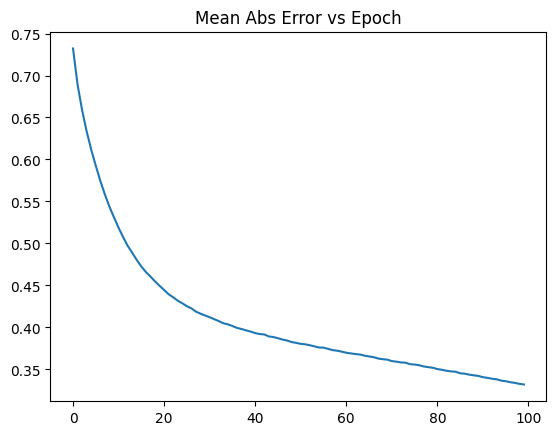

In [3]:
model = CollaborativeFiltering(num_epochs = 100, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 0.5, regularization = 0.00)
model.set_data_loader(data_loader)
model.train(debug=True)
model.save('test_collaborative_filtering', overwrite=True)

In [4]:
pprint(model.score_and_predict_n_games_for_user(76561199437467620)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199437467620)[-10:])
pprint(model.score_and_predict_n_games_for_user(76561198138705933)[:10])
pprint(model.score_and_predict_n_games_for_user(76561198138705933)[-10:])

[(271590, {'score': 2.5076726845743127}),
 (252490, {'score': 2.4208544646195884}),
 (1245620, {'score': 2.167231700324081}),
 (4000, {'score': 1.7159297082791}),
 (359550, {'score': 1.6748035967898547}),
 (1293830, {'score': 1.5854395827550007}),
 (394360, {'score': 1.5457379417113097}),
 (105600, {'score': 1.528348382434695}),
 (1174180, {'score': 1.524846265827665}),
 (221100, {'score': 1.5160312069543056})]
[(539370, {'score': 0.21011316588633272}),
 (497090, {'score': 0.20984074235922154}),
 (506280, {'score': 0.20827151416697082}),
 (754620, {'score': 0.20203541953314352}),
 (538880, {'score': 0.20064984741368933}),
 (449240, {'score': 0.19992121062624163}),
 (477130, {'score': 0.19833964073410482}),
 (847790, {'score': 0.19791418862220883}),
 (568300, {'score': 0.19630092750203396}),
 (591680, {'score': 0.19574964852588084})]
[(271590, {'score': 2.640676321508603}),
 (1245620, {'score': 2.179209685418589}),
 (236850, {'score': 2.1183543863897794}),
 (1811260, {'score': 1.8353428

In [5]:
second_common_neighbors_model = CollaborativeFiltering(num_epochs = 20, num_user_embedding = 50, num_game_embedding = 50, learning_rate = 0.01, regularization = 0.05)
second_common_neighbors_model.set_data_loader(data_loader)
second_common_neighbors_model.load('test_collaborative_filtering')

KeyError: 'seed    '